In [6]:
%run src/ZooAnimals.ipynb

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
#### Addressing the warning for Windows Memory Leak in using K-Means
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [9]:
file_path = r"C:\Users\Akash Mittal\Documents\Zoo_Lab\zoo.xlsx" #File Path of the Input File with Features of Animals

In [10]:
animal_data = DataProcessor(file_path)

In [11]:
animal_data.import_data() # Imporitng Data

File Read OK.


In [12]:
print(animal_data.data) #Snapshot of Input Data

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [13]:
X = animal_data.data.drop(['class_type'], axis=1) # Dropping the Class_type column

In [14]:
Y = animal_data.data['class_type'] # Target Column for Animal Class 

In [15]:
# animal_data.create_pair_plot() # Creating a PairWise ScatterPlot for the Different Animal Features {Commented Out as it Takes more time to Plot that much graphs}

In [16]:
# Using AffinityPropagation to Cluster the Data Points

In [17]:
#Segregating only Numeric Data for Analysis
X_numeric = X.drop(['animal_name'], axis=1)

In [18]:
#Creating Affinity Object; the damping factor can be between [0.5, 1), preference for exemplars is set None, no preference to any point.
af = AffinityPropagation(damping = 0.7, preference = None)

In [19]:
# Fitting of the Affinity Propagation algorithm
af.fit(X_numeric)

AffinityPropagation(damping=0.7)

In [20]:
#Get the Cluster Centers
cluster_centers = af.cluster_centers_

In [21]:
#Get labels for each data point
labels = af.labels_

In [22]:
# Number of Clusters
n_clusters = len(cluster_centers)
print(n_clusters)

8


In [23]:
# plotting the clusters

In [24]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

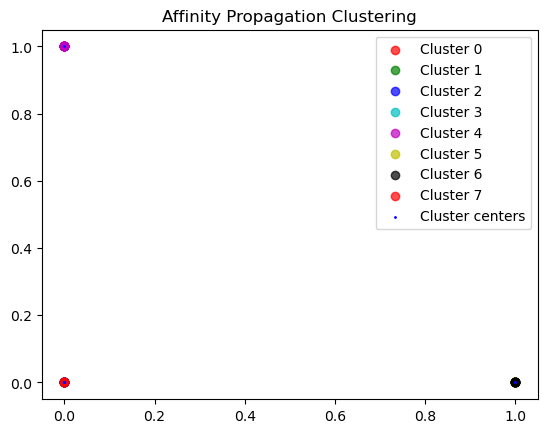

In [25]:
for i in range(n_clusters):
    plt.scatter(X_numeric.values[labels == i, 0], X_numeric.values[labels == i, 1], c=colors[i % len(colors)], alpha=0.70, label='Cluster {}'.format(i))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=1, color='blue', label='Cluster centers')
plt.title('Affinity Propagation Clustering')
plt.legend()
plt.show()

In [26]:
#Labelling the Clusters
unique_labels = np.unique(labels)
for label in unique_labels:
    cluster_size = np.sum(labels == label)
    print(f"Cluster {label}: {cluster_size} data points")

Cluster 0: 19 data points
Cluster 1: 12 data points
Cluster 2: 7 data points
Cluster 3: 15 data points
Cluster 4: 20 data points
Cluster 5: 17 data points
Cluster 6: 7 data points
Cluster 7: 4 data points


In [27]:
# Comparison of Group from Initial Actual Set to Cluster made by Affinity Propagation
# The difference in actual set and the outputs is not part of the project yet, However I will compare the results of the two ML classifiers used, Affinity Propagation and K-Means.

animal_info = animal_data.data[['animal_name', 'class_type']].copy()
animal_info['cluster_label'] = labels
pd.set_option('display.max_rows', None)
print(animal_info)


    animal_name  class_type  cluster_label
0      aardvark           1              5
1      antelope           1              3
2          bass           4              0
3          bear           1              5
4          boar           1              5
5       buffalo           1              3
6          calf           1              3
7          carp           4              0
8       catfish           4              0
9          cavy           1              3
10      cheetah           1              5
11      chicken           2              4
12         chub           4              0
13         clam           7              7
14         crab           7              2
15     crayfish           7              1
16         crow           2              4
17         deer           1              3
18      dogfish           4              0
19      dolphin           1              0
20         dove           2              4
21         duck           2              4
22     elep

In [28]:
# Calculating Silhoutte Score For the Affinity Proparation Algorithm
silhouette_AFP = silhouette_score(X_numeric, labels)
print(f"Silhouette Score Affinity Propagation: {silhouette_AFP}")

Silhouette Score Affinity Propagation: 0.4058813482819153


In [29]:
# Applying K-Means Algorithm 

In [38]:
# Selecting Features to use for K-Means Clustering
# But we already calculate it in X_numeric, so using that
# X_numeric has data without animal_name and class_type
# Further, Y has the class_type field stored in it.

In [39]:
# A short review of what is stored in X_numeric and Y
#print(X_numeric,Y)

In [43]:
# Initializing the KMeans with n_init=10, to avoid warning for change in values of Kmeans algorithm in later release of ski-kit learn.
# Specified number of Clusters as 7, as we know there are 7 clusters.

In [44]:
kmeans = KMeans(n_clusters=7, random_state=30, n_init=10)

In [45]:
animal_kmean_labels = kmeans.fit_predict(X_numeric)

In [46]:
animal_kmeans_silhouette = silhouette_score(X_numeric, animal_kmean_labels)

In [47]:
# Pairwise distances between the points for KMeans algo.

In [48]:
pair_wise_distance = np.linalg.norm(X_numeric.values[:, np.newaxis, :] - X_numeric.values, axis=2)

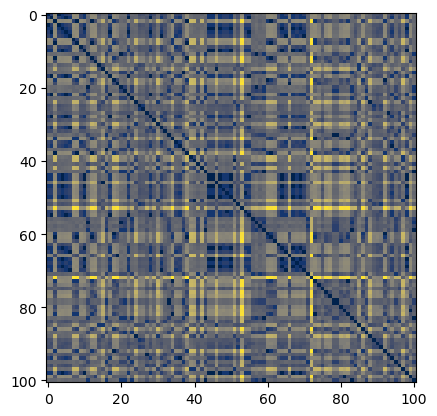

In [49]:
# A generic plot of PairWise Distances
plt.imshow(pair_wise_distance, cmap='cividis', interpolation='none')

In [50]:
# Fitting the K-Means algorithm
kmeans.fit(X_numeric)

KMeans(n_clusters=7, n_init=10, random_state=30)

In [51]:
kmeans_labels = kmeans.labels_

In [52]:
silhouette_avg = silhouette_score(pair_wise_distance, kmeans_labels)

In [53]:
print("K-Means Cluster Labels:", kmeans_labels)

K-Means Cluster Labels: [5 5 1 5 5 5 5 1 1 5 5 2 1 3 0 4 2 5 1 1 2 2 5 2 4 0 0 6 5 6 4 5 6 2 1 5 5
 2 1 4 4 2 4 2 5 5 4 5 5 5 5 4 0 4 5 5 2 2 2 2 1 1 1 5 5 5 1 5 5 5 5 2 4 1
 1 6 1 3 2 2 1 3 1 2 6 0 1 2 4 0 0 0 1 6 5 2 6 4 5 3 2]


In [55]:
print("K-Means Silhouette Score:", silhouette_avg)

K-Means Silhouette Score: 0.5451877008613015
